In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import preprocessing
#import visuals as vs
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale as scale
 

In [3]:
import os
os.chdir('C:/Users/ASHISH/Desktop/UNSUPERVISED')
data = pd.read_csv("Wholesale customers data.csv")
data_df = pd.read_csv("Wholesale customers data.csv")

# 1)EDA

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
data.shape

(440, 8)

In [7]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
data_1 = data.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [10]:
indices = [100,200, 300]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,11594,7779,12144,3252,8035,3029
1,3067,13240,23127,3941,9959,731
2,16448,6243,6360,824,2662,2005


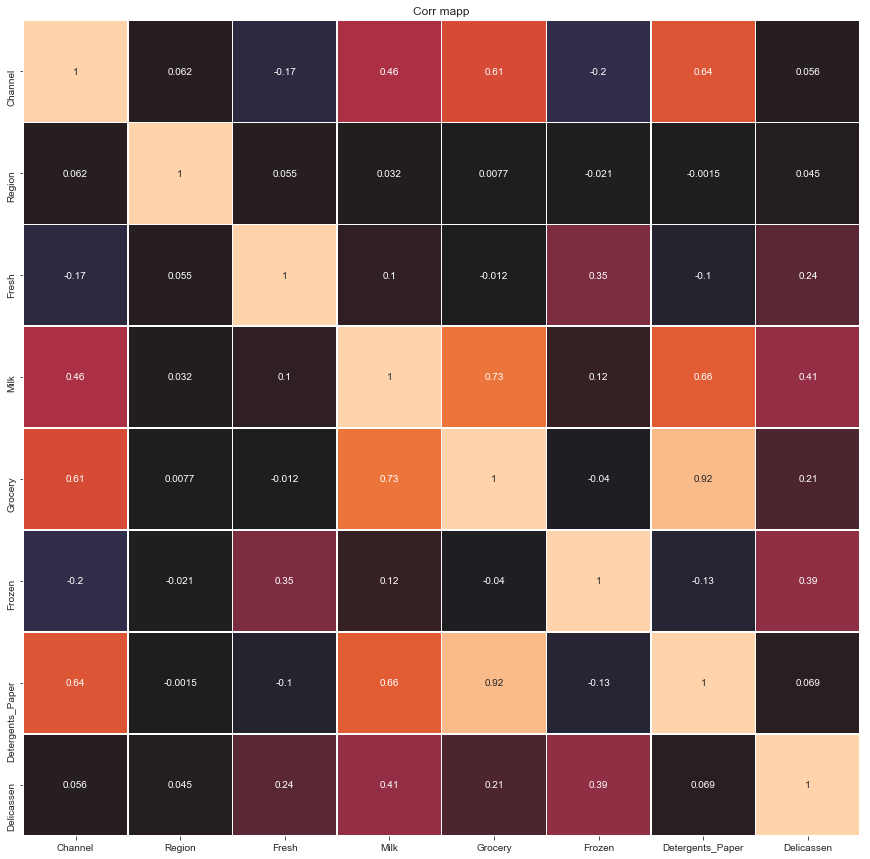

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data_df.corr(), annot=True, linewidths=.5, center=0, cbar=False)
plt.title('Corr mapp')
plt.show()

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


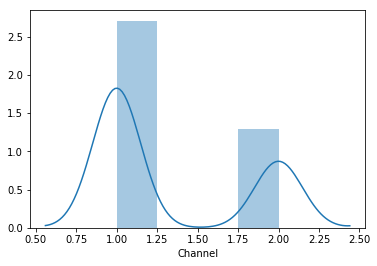

In [12]:
sns.distplot(data_df.Channel)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


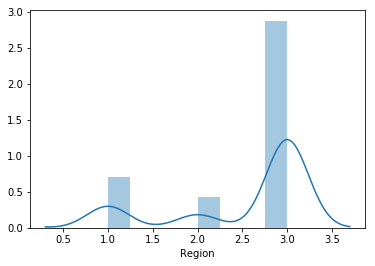

In [13]:
sns.distplot(data_df.Region)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


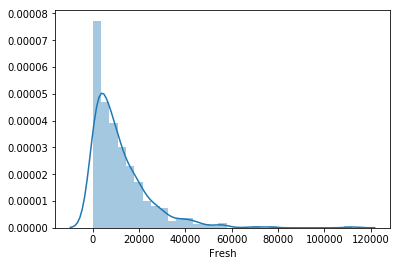

In [14]:
sns.distplot(data_df.Fresh)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


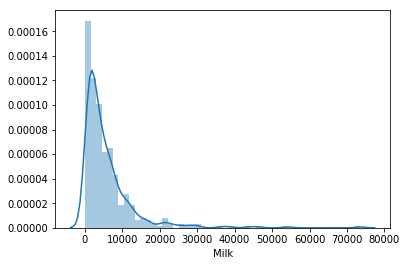

In [15]:
sns.distplot(data_df.Milk)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


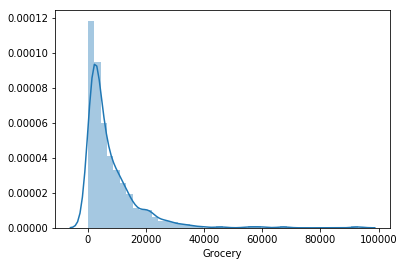

In [16]:
sns.distplot(data_df.Grocery)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


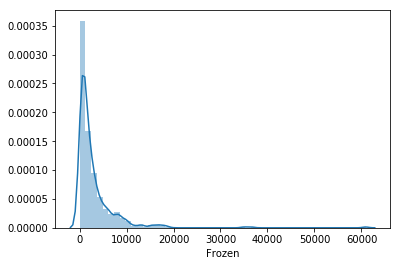

In [17]:
sns.distplot(data_df.Frozen)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


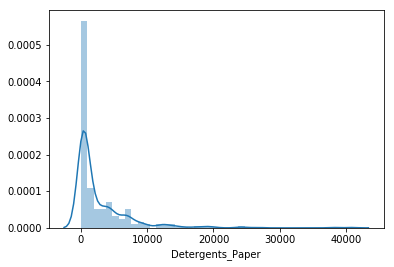

In [18]:
sns.distplot(data_df.Detergents_Paper)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


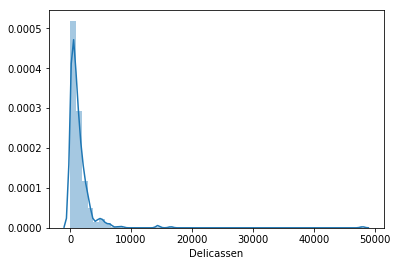

In [19]:
sns.distplot(data_df.Delicassen)

In [20]:
def pairplot(cols_keep):
    g = sns.pairplot(data_df,vars=cols_keep,kind='scatter',hue='Channel')
    return

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ASHISH\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


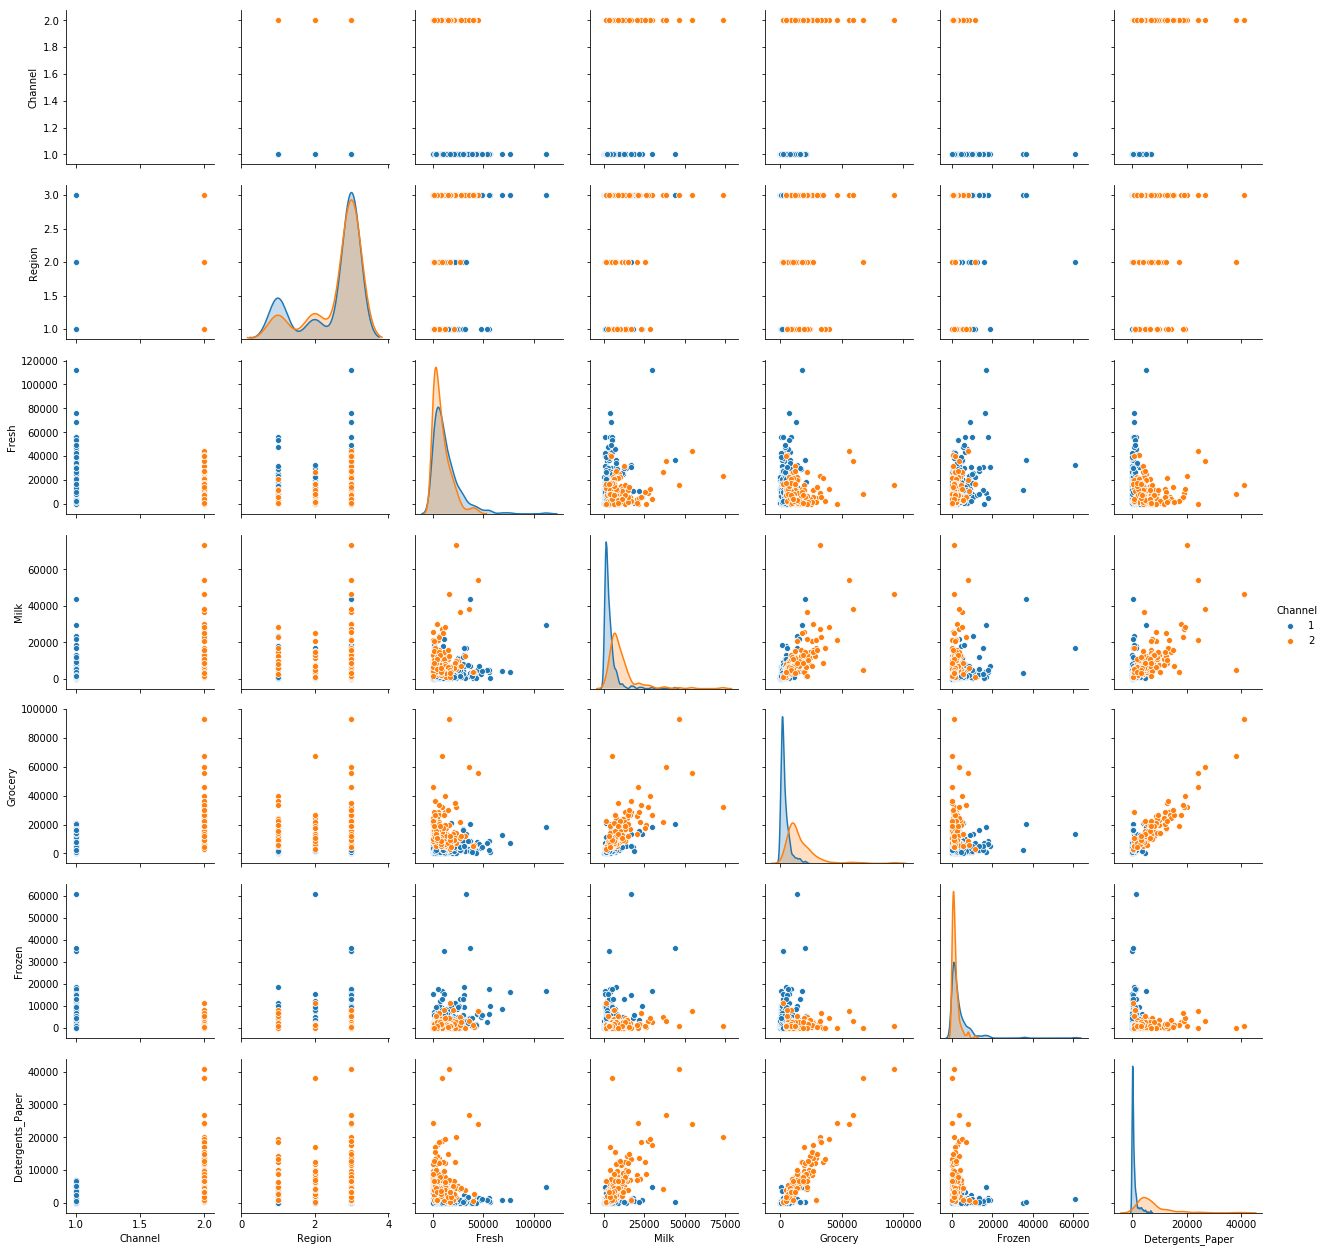

In [21]:
cols_keep = list(data_df.columns[0:7])
pairplot(cols_keep)

#  Use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data

In [22]:
targ_feature = data['Detergents_Paper']
new_data = data.drop(['Detergents_Paper'], axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_data, targ_feature, test_size = 0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print ("score = ", score)

score =  0.7286551812541454


In [23]:
from sklearn.tree import DecisionTreeRegressor

def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

def r_2_mean(data,feature,runs=200):
    return np.array([calculate_r_2_for_feature(data,feature) 
                     for _ in range(runs) ]).mean().round(4)

print ("{0:17} {1}".format("Fresh: ", r_2_mean(data,'Fresh')))
print ("{0:17} {1}".format("Milk: ", r_2_mean(data,'Milk')))
print ("{0:17} {1}".format("Grocery: ", r_2_mean(data,'Grocery')))
print ("{0:17} {1}".format("Frozen: ", r_2_mean(data,'Frozen')))
print ("{0:17} {1}".format("Detergents_Paper: ", r_2_mean(data,'Detergents_Paper')))
print ("{0:17} {1}".format("Delicassen: ", r_2_mean(data,'Delicassen')))

Fresh:            -0.8171
Milk:             0.064
Grocery:          0.6703
Frozen:           -1.1886
Detergents_Paper:  0.6725
Delicassen:       -3.9929


# Visualize Feature Distributions

C:\Users\ASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


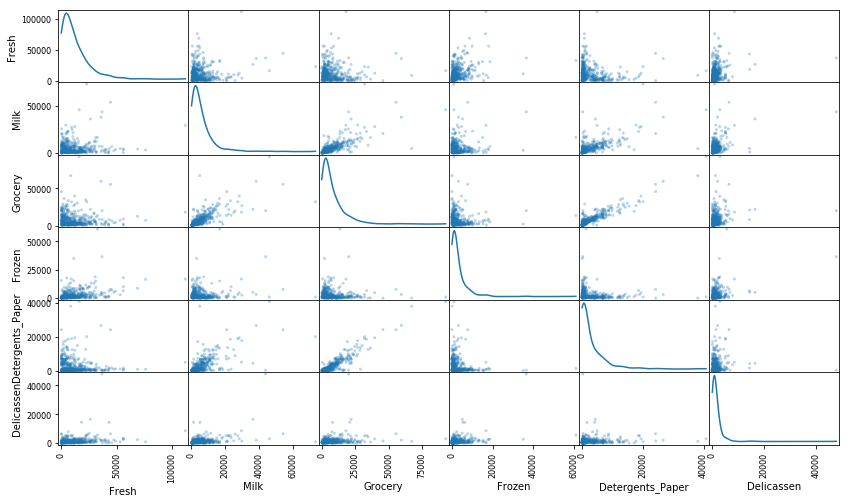

In [24]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

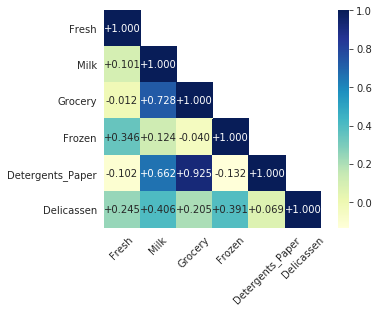

In [25]:
# visualize snippet from reviewer
import matplotlib.pyplot as plt
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap="YlGnBu", fmt='+.3f')
    plt.xticks(rotation=45, ha='center',)

C:\Users\ASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """


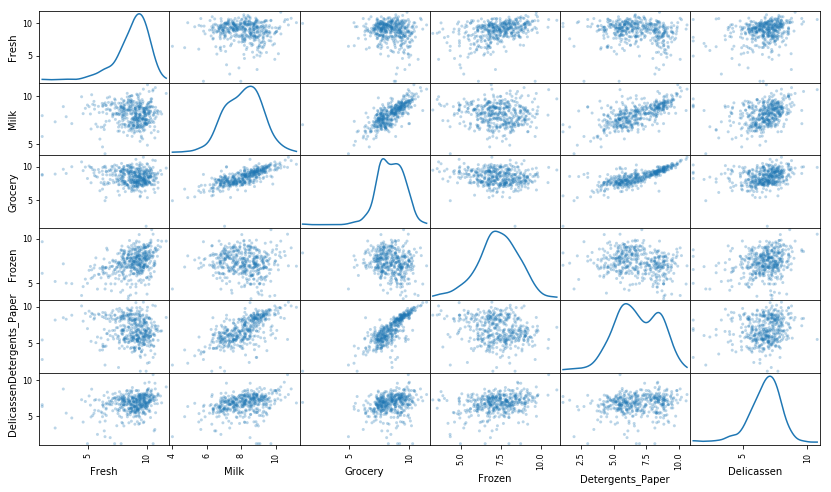

In [26]:
log_data = np.log(data)

log_samples = np.log(samples)

pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


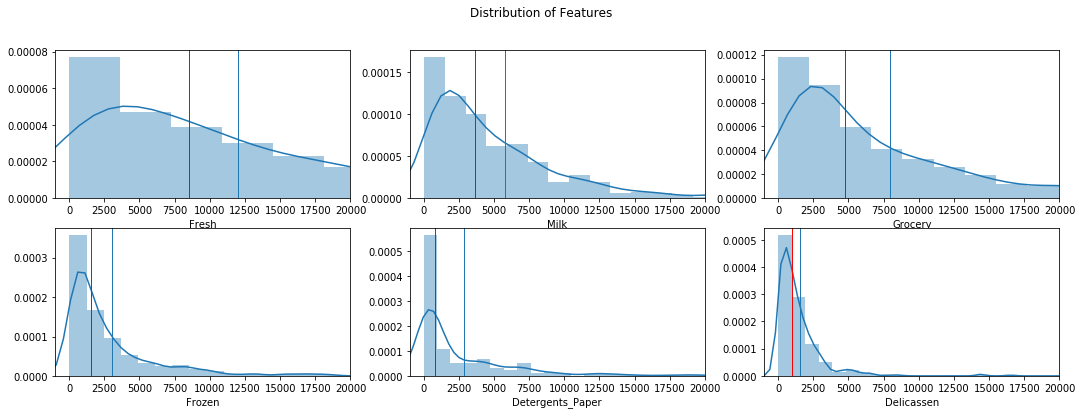

In [27]:
# before transform, credit to reviewer for code
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

product_data_by_customer_df = data

for i, col in enumerate(product_data_by_customer_df.columns):
    feature = product_data_by_customer_df[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


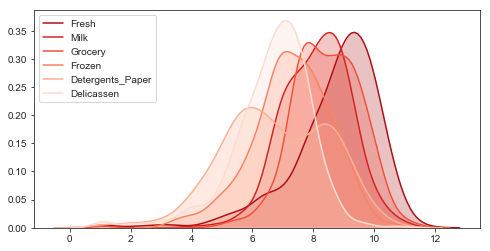

In [29]:
# compare log-transformed features w each other (credit to reviewer)
import matplotlib.pyplot as plt
import seaborn as sns
# set plot style & color scheme
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc='best')

In [30]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


## 3) Implementation of Outlier Detection

In [31]:
outliers = []
set_dict  = {}


# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    #print "Data points considered outliers for the feature '{}':".format(feature)
    #display(feature_outliers)
    print ("{} num outliers: {}".format(feature, len(feature_outliers)))
    
    outliers.append(feature_outliers.index.tolist())
    set_dict[feature] = set(feature_outliers.index.tolist())

    
# take one set in setlist. do union with that set and rest of sets. print common outliers

import copy

for feature, set_i in set_dict.items():
    dict_copy = copy.deepcopy(set_dict)
    del dict_copy[feature]
    
    for remaining_feature, set_j in dict_copy.items():
        intersection = set.intersection(set_i, set_j)
        if len(intersection):
            print (intersection, "in both {}, {}".format(feature, remaining_feature))

Fresh num outliers: 16
Milk num outliers: 4
Grocery num outliers: 2
Frozen num outliers: 10
Detergents_Paper num outliers: 2
Delicassen num outliers: 14
{65} in both Fresh, Frozen
{128, 66} in both Fresh, Delicassen
{154} in both Milk, Grocery
{154} in both Milk, Delicassen
{154} in both Grocery, Milk
{75} in both Grocery, Detergents_Paper
{154} in both Grocery, Delicassen
{65} in both Frozen, Fresh
{75} in both Detergents_Paper, Grocery
{128, 66} in both Delicassen, Fresh
{154} in both Delicassen, Milk
{154} in both Delicassen, Grocery


In [32]:
outliers = [154, 75, 65, 66, 128]
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

In [33]:
outliers_all  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    outliers_all += feature_outliers.index.tolist()

# Remove the outliers, if any were specified
bad_data = log_data.drop(log_data.index[outliers_all]).reset_index(drop = True)

# 2)Feature Scaling
# Implementation: PCA

In [34]:
data_feature = data_df.drop(labels = "Channel", axis = 1)

In [35]:
standardizedData = StandardScaler().fit_transform(data_feature)
X = standardizedData
y = data_df.Channel

C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


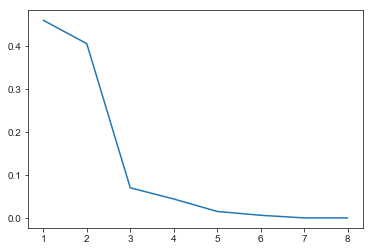

In [36]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(data_df)
#pca.get_covariance()
#pca.explained_variance_
#pca.explained_variance_ratio_
#pca.explained_variance_ratio_.cumsum()
a=pca.explained_variance_ratio_
g=range(1,9)
plt.plot(g,a)
plt.show()

In [37]:
pca = PCA(.90)

principalComponents1 = pca.fit_transform(data_df)
# To get how many principal components was chosen
n_components = pca.n_components_
print("n_components = ",pca.n_components_)
pca = PCA(n_components)

principalComponents2 = pca.fit_transform(data_df)

# to get how much variance was retained
print(pca.explained_variance_ratio_.sum())

n_components =  3
0.9348159635455102


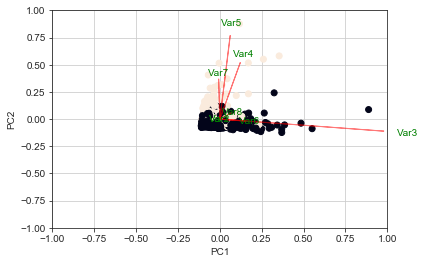

In [38]:
pca = PCA()
x_new = pca.fit_transform(data_df)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [39]:
X_Train, X_Test, Y_Train, Y_Test= train_test_split(X,y, test_size=0.2,random_state = 100)
X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape

((352, 7), (88, 7), (352,), (88,))

In [40]:
DTClassifier = DecisionTreeClassifier (criterion='entropy', max_depth=3, min_samples_split = 3)
DTClassifier.fit (X_Train,Y_Train)
predicted_labels1 = DTClassifier.predict(X_Test)
accuracyscore1 = accuracy_score(Y_Test, predicted_labels1)
print("accuracy = ", accuracyscore1*100.0)
print(confusion_matrix(Y_Test, predicted_labels1))
print(classification_report(Y_Test, predicted_labels1))

accuracy =  90.9090909090909
[[59  4]
 [ 4 21]]
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        63
           2       0.84      0.84      0.84        25

   micro avg       0.91      0.91      0.91        88
   macro avg       0.89      0.89      0.89        88
weighted avg       0.91      0.91      0.91        88



In [41]:
X_Train1 = principalComponents2
X_Test1 = principalComponents2
Y_Train1 = y 
Y_Test1= y
X_Train1.shape, X_Test1.shape, Y_Train1.shape, Y_Test1.shape

((440, 3), (440, 3), (440,), (440,))

In [42]:
DTClassifier = DecisionTreeClassifier (criterion='gini', max_depth=3, min_samples_split = 3)
DTClassifier.fit (X_Train1,Y_Train1)
predicted_labels2 = DTClassifier.predict(X_Test1)
accuracyscore2 = accuracy_score(Y_Test1, predicted_labels2)
print("accuracy = ", accuracyscore2*100.0)
print(confusion_matrix(Y_Test1, predicted_labels2))
print(classification_report(Y_Test1, predicted_labels2))

accuracy =  91.13636363636364
[[276  22]
 [ 17 125]]
              precision    recall  f1-score   support

           1       0.94      0.93      0.93       298
           2       0.85      0.88      0.87       142

   micro avg       0.91      0.91      0.91       440
   macro avg       0.90      0.90      0.90       440
weighted avg       0.91      0.91      0.91       440



Text(0.5,0.98,'Cluster Dendrogram')

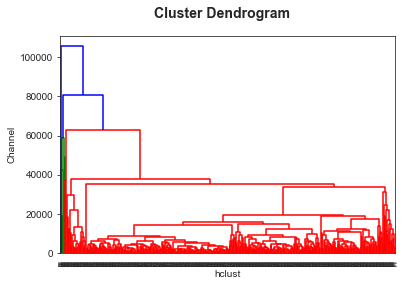

In [50]:
pdist
#help(pdist)
d_euc = pdist(data_df.iloc[:,2:7], metric = "euclidean")
#Building the cluster

#help(linkage)
clus1 = linkage(d_euc, method = "average")
#Displaying the clusters in Dendrogram

dendrogram(clus1, labels = data_df[["Region"]].values.tolist())
plt.xlabel("hclust")
plt.ylabel("Channel")
plt.suptitle("Cluster Dendrogram", fontweight = 'bold', fontsize =14)



In [45]:
print(np.round(squareform(d_euc).tolist(),3))

[[    0.     2645.63   6917.558 ... 25745.652  5998.052  5658.216]
 [ 2645.63      0.     6390.091 ... 23718.681  8014.268  7974.786]
 [ 6917.558  6390.091     0.    ... 26014.643  8689.595 10109.236]
 ...
 [25745.652 23718.681 26014.643 ...     0.    31628.165 31287.   ]
 [ 5998.052  8014.268  8689.595 ... 31628.165     0.     2327.407]
 [ 5658.216  7974.786 10109.236 ... 31287.     2327.407     0.   ]]


# 5)K Means Clustering

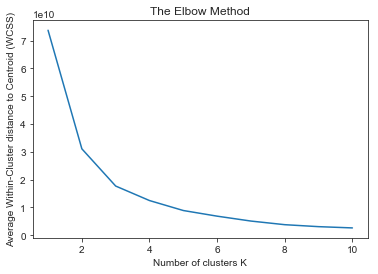

In [46]:
X=data_df.iloc[: , [2,7]].values

# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans=KMeans(n_clusters=i, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid (WCSS)')  
plt.show()

In [47]:
# Applying k-means to the dataset
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
y_kmeans=kmeans.fit_predict(X)

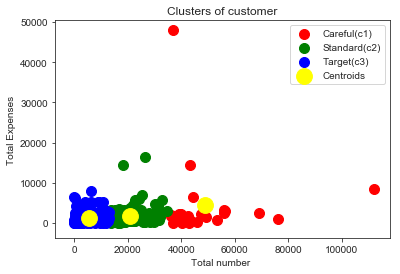

In [48]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label='Careful(c1)')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label='Standard(c2)')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label='Target(c3)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'yellow', 
            label='Centroids')
plt.title('Clusters of customer')
plt.xlabel('Total number ')
plt.ylabel('Total Expenses')
plt.legend()
plt.show()